### Politecnico di Torino - Physics I Lab

# TITLE

### Date - Team

**Student 1 - Registration number 293513`**

**Studente 2 - Registration number 296768**

**studente 3 - Registration number 290918 **


### Theory - Goals

(to be completed)

How to write inline formulae: $\sqrt{x}$.

How to write a display formula:
$$ 
f_\mathrm{costo}(A,B) = \sum_{i=1}^n (A + B x_i - y_i)^2.
$$


### Materials 
¡ rail of length L; ¡ support for the rail; ¡ cart; ¡ transparent plexiglas mask; ¡ tape measure; ¡ bubble level; ¡ Smart Timer; ¡ two photogates connected to the smart timer.




### Estimates of uncertainties



### Results

g = 917.38 +/- 46.45	 cm/s**2 (estimate for gravity acceleration)

g:  927.1770258963788 cm/s**2 //Dynamic friction percentage 1.250391782239074 % (Using the equations for  𝛼  and  𝑎  for two different inclination values, solve for  𝑔  e  𝜇𝑘, and estimates)

g:  914.0439037503322 cm/s**2 //Dynamic friction percentage 0.2650937439160214 % (estimate  𝑔  and  𝜇d  with a linear fit, using all the available measures)


| Tables        | Are           | Cool  |
| ------------- |---------------|-------|
| columns are   | right-aligned |  1600 |
| this is       | an example    |    12 |
| zebra stripes | are neat      |     1 |


https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet

 
### Conclusions
 
- through the inclined plane, we can deduce that when an objext slides through it, it is affected by gravity acceleration causing it to speed up as it slides.

- the acceleration isn't that of gravity exactly, because of the inclination, the acceleration is directly proportional to the angle of inclination.

- we also concluded that the affects of friction during this experiment ae very small and neglegiable.

### REMEMBER:
- express uncertainties by a single significant digit; 
- never use more significant digits than those provided by the sensitivity of the instrument
- always write physical units, both in the text and in graphs (numbers without physical units have no meaning) 
- explain why you have used given formulae to find your results and estimate uncertainties
- add your own observation and comments 


#     DATA ANALYSIS

### Import libraries, set variables

In [469]:
%matplotlib notebook
from pylab import *
from math import asin
import numpy as np

In [470]:
### the following dictionaries will be used to collect results obtained 
### with varying values of H:

acc       = {}
dacc      = {}
sinalpha  = {}
dsinalpha = {}

In [471]:
def quadratic_fit(x,y):        
    """
    This function computes the coefficients of the
    parabola y = A x**2 + B x interpolating points (x,y),
    and the corresponding error estimates.
    """
    
    mx = mean(x)
    mx2 = mean(x*x)
    mx3 = mean(x**3)
    mx4 = mean(x**4)
    mxy = mean(x*y)
    mx2y = mean(x*x*y)
    
    D = mx2*mx4 - mx3**2
    A = (mx2y*mx2 - mxy*mx3) / D
    B = (mxy*mx4 - mx3*mx2y) / D
    
    n = len(x)
    r = sqrt(sum((A*x**2+B*x - y)**2) / (n-2))
    dA = r * sqrt(mx2 / (n*D))
    dB = r * sqrt(mx4 / (n*D))
    
    return A, dA, B, dB


def linear_fit(x,y):        
    """
    This function computes the coefficients of the
    parabola y = A x**2 + B x interpolating points (x,y),
    and the corresponding error estimates.
    """
   
    mx = mean(x)
    mx2 = mean(x*x)
    mx3 = mean(x*y)
    mx4 = mean(x*x*y)
    my = mean(y)
    sdx = mx2 - mx**2
    A = (mx2*my - mx3*mx)/sdx
    B = (mx3-mx*my)/sdx
    
    n = len(x)
    r2 = (1/(n-2))*(sum((A+B*x-y)**2))
    dA = sqrt(mx2/(n*sdx)*r2)
    dB = sqrt((1/(n*sdx))*r2)
    return A, dA, B, dB
    
   


### Data collection

#### first series (first inclination value)

In [472]:

import numpy as np
# measure the length of the rail, from end to end
# physical units are cm
# the uncertainty is 0,5 millimeters since the sensibility of the instrument used is 1 millimeter. ​

L   = 121.7  # [cm] length of the rail
dL  = 0.05  # [cm] uncertainty on the length of the rail

# set the rail in horizontal position using the bubble level
# measure the distance between the rail surface and the table
# at each end of the rail (the two ends are here denoted as A and B) 
# physical units are... (cm)

hA0 =  2.7  # [cm] distance between the rail surface and the table in A
hB0 =  3.7  # [cm] distance between the rail surface and the table in B

dh0  =  0.05  # [cm] uncertainty is 0,5 millimeters since the sensibility of the instrument used is 1 millimeter.

# now incline the rail and measure again the distance between
# the rail surface and the table in both A and B

hA  = 25.5  # [cm] distance between the rail surface and the table in A
hB  = 2.2   # [cm] distance between the rail surface and the table in B

dh  =  0.2   # [cm] uncertainty is 2 mm since we are summing the 4 height’s uncertainties

# write here the list of the distances S between the two photogates 20,
# that will be used for data collection
# pay attention: do not change the python syntax (parentheses, brackets, 
# commas, etc. - emptly spaces do not matter)
# physical units are...cm 
# the uncertainty is...0.5 mm

S = np.array([
        20.0, # [cm] distance S1
        30.0, # [cm] distance S2
        40.0, # [cm] distance S3
        50.0, # [cm] distance S4
    ])

# physical units are... (cm)
# the uncertainty is... 0,5 mm since the sensibility of the instrument is 1 mm. ​


dS = np.array([ 
        0.05,  # [cm] uncertainty on distance S1
        0.05,  # [cm] uncertainty on distance S2
        0.05,  # [cm] uncertainty on distance S3
        0.05,  # [cm] uncertainty on distance S4
    ])

# write here the times between the passage from the first photogate
# and the passage through the second photogate
# T is a matrix containing in each row the times relative to a given value of S
# different rows correspond to different values of S
# physical units are... (seconds)


T = np.array([
    [
    0.2145,   # at least 5 times, measured with the distance S1
    0.2147,
    0.2144,
    0.2153,
    0.2146,
    ],
   
    [
    0.3004,   # at least 5 times, measured with the distance S2
    0.2991,
    0.2987,
    0.2994,
    0.2998,
    ],
    
    [
    0.3739,   # at least 5 times, measured with the distance S3
    0.3736,
    0.3729,
    0.3725,
    0.3732,
    ],
    
    [
    0.4430,   # at least 5 times, measured with the distance S4
    0.4445,
    0.4437,
    0.4432,
    0.4438,
    ]
])

# estimate the uncertainty on times using the standard error of the mean
# #The standard error of the mean is found through this formula: 
errT  = stdT / sqrt(n-1)  



#### first series: data analysis

standard error of the mean:  [0.00015811 0.00029223 0.00024779 0.00026192]

H    = 21.3000000000 +/- 0.2000000000 cm	(elevatin of rail end A)
sina = 0.175020542317173372071081871582 +/- 0.001644957762059771032292498916	(seno dell angolo di inclinazione)

series	| space S [cm]	| mean time T [s]
--------+---------------+--------------------
1	| 20.00000000000 +/- 0.05000000000 	| 0.214700000000000 +/- 0.000158113883008
2	| 30.00000000000 +/- 0.05000000000 	| 0.299480000000000 +/- 0.000292232783924
3	| 40.00000000000 +/- 0.05000000000 	| 0.373220000000000 +/- 0.000247790233867
4	| 50.00000000000 +/- 0.05000000000 	| 0.443640000000000 +/- 0.000261916017074

v1 =  74.71 +/- 0.93 cm/s	(velocity when passing through first photogate)
a  = 171.91 +/- 4.90 cm/s**2	(cart acceleration)
g  =982.20 +/- 1.00 cm/s**2	(estimate for gravity acceleration)



<IPython.core.display.Javascript object>


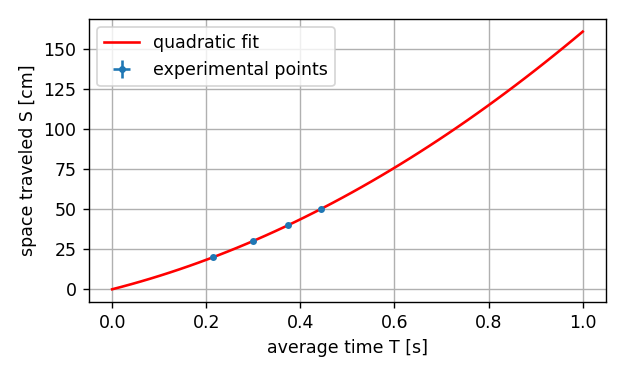

In [473]:
import math
import numpy as np
H     = (25.5 - 2.7) - (3.7-2.2)
dH    = 0.2 ### SUBSTITUTE HERE THE EXPRESSION OBTAINED BY THE FORMULA FOR UNCERTAINTY PROPAGATION ###
L = 121.7

sina  = H / L 
alpha = asin(sina)*180/pi                  # [degrees] inclination angle
dsina = sqrt( (dH/L)**2 + (H/L**2 * dL)**2)  # uncertainty is estimated using uncertainty propagation formula

n     = 5                           # number of measures of time for each value of S
aveT  = average(T,axis=1)                    # average time, for each value of S
stdT  = std(T,axis=1)                        # standard deviation
errT  = stdT / sqrt(n-1)                     # standard error of the mean

A, dA, B, dB = quadratic_fit(aveT,S)

v1   = B
dv1  = dB
a    = 2*A
da   = 2*dA

g    = a/sina
dg   = 1.0 ### SUBSTITUTE HERE THE EXPRESSION OBTAINED BY THE FORMULA FOR UNCERTAINTY PROPAGATION ###

acc[H]=a                    # obtained results are saved in the dictionaries for later use
dacc[H]=da
sinalpha[H]=sina
dsinalpha[H]=dsina

# NB: the symbol %.30f means that the number (here, sina)
# has to be printed with 30 digits after the decimal point
### CHECK THAT THE NUMBER OF PRINTED DIGITS (SIGNIFICANT DIGITS)
### IS COMPATIBLE WITH ESTIMATE OF THE UNCERTAINTY!
print("standard error of the mean: ", errT)
print('')
print('H    = %.10f +/- %.10f cm\t(elevatin of rail end A)'%(H,dH))           
print('sina = %.30f +/- %.30f\t(seno dell angolo di inclinazione)'%(sina,dsina))

# NB: the symbol \t is a tabulation character

print('')
print('series\t| space S [cm]\t| mean time T [s]')
print('--------+---------------+--------------------')

for k in range(T.shape[0]):
    print('%i\t| %.11f +/- %.11f \t| %.15f +/- %.15f'
          %(k+1,S[k],dS[k],aveT[k],errT[k]))
    
print('')

print('v1 =  %.2f +/- %.2f cm/s\t(velocity when passing through first photogate)'% (v1, dv1)) 
print('a  = %.2f +/- %.2f cm/s**2\t(cart acceleration)'%(a, da))  
print('g  =%.2f +/- %.2f cm/s**2\t(estimate for gravity acceleration)'%(g, dg))  

print('')

t=linspace(0,1)
def fit_fun(t): return A*t**2 + B*t 

fig=figure('parabola (%.2f degree inclination)'
           %alpha,figsize=(5,3))
errorbar(aveT,S,xerr=errT,yerr=dS,fmt='.',label='experimental points')
plot(t,fit_fun(t),'r',label='quadratic fit')
legend()
xlabel('average time T [s]')
ylabel('space traveled S [cm]')
grid()
fig.tight_layout()

#### second series (second inclination value)

In [474]:

import numpy as np
# measure the length of the rail, from end to end
# physical units are cm
# the uncertainty is 0,5 millimeters since the sensibility of the instrument used is 1 millimeter. ​

L   = 121.7  # [cm] length of the rail
dL  = 0.05  # [cm] uncertainty on the length of the rail

# set the rail in horizontal position using the bubble level
# measure the distance between the rail surface and the table
# at each end of the rail (the two ends are here denoted as A and B) 
# physical units are... (cm)

hA0 =  2.7  # [cm] distance between the rail surface and the table in A
hB0 =  3.7  # [cm] distance between the rail surface and the table in B

dh0  =  0.05  # [cm] uncertainty is 0,5 millimeters since the sensibility of the instrument used is 1 millimeter.

# now incline the rail and measure again the distance between
# the rail surface and the table in both A and B

hA  = 29.7  # [cm] distance between the rail surface and the table in A
hB  = 2.4   # [cm] distance between the rail surface and the table in B

dh  =  0.2   # [cm] uncertainty is 2 mm since we are summing the 4 height’s uncertainties

# write here the list of the distances S between the two photogates 20,
# that will be used for data collection
# pay attention: do not change the python syntax (parentheses, brackets, 
# commas, etc. - emptly spaces do not matter)
# physical units are...cm 
# the uncertainty is...0.5 mm

S = np.array([
        20.0, # [cm] distance S1
        30.0, # [cm] distance S2
        40.0, # [cm] distance S3
        50.0, # [cm] distance S4
    ])

# physical units are... (cm)
# the uncertainty is... 0,5 mm since the sensibility of the instrument is 1 mm. ​


dS = np.array([ 
        0.05,  # [cm] uncertainty on distance S1
        0.05,  # [cm] uncertainty on distance S2
        0.05,  # [cm] uncertainty on distance S3
        0.05,  # [cm] uncertainty on distance S4
    ])

# write here the times between the passage from the first photogate
# and the passage through the second photogate
# T is a matrix containing in each row the times relative to a given value of S
# different rows correspond to different values of S
# physical units are... (seconds)



T = array([
    [
    0.1962,   # at least 5 times, measured with the distance S1
    0.1961,
    0.1961,
    0.1962,
    0.1961,
    ],
   
    [
    0.2739,   # at least 5 times, measured with the distance S2
    0.2734,
    0.2740,
    0.2742,
    0.2737,
    ],
    
    [
    0.3427,   # at least 5 times, measured with the distance S3
    0.3427,
    0.3427,
    0.3429,
    0.3429,
    ],
    
    [
    0.4070,   # at least 5 times, measured with the distance S4
    0.4071,
    0.4073,
    0.4068,
    0.4077,
    ]])


# estimate the uncertainty on times using the standard error of the mean
# #The standard error of the mean is found through this formula: 
errT  = stdT / sqrt(n-1)  



#### second series: data analysis

standard error of the mean:  [2.44948974e-05 1.36381817e-04 4.89897949e-05 1.52970585e-04]

H    = 26.8000000000 +/- 0.2000000000 cm	(elevatin of rail end A)
sina = 0.220213640098603113948172449454 +/- 0.001645873939912701876958633918	(seno dell angolo di inclinazione)

series	| space S [cm]	| mean time T [s]
--------+---------------+--------------------
1	| 20.00000000000 +/- 0.05000000000 	| 0.196140000000000 +/- 0.000024494897428
2	| 30.00000000000 +/- 0.05000000000 	| 0.273840000000000 +/- 0.000136381816970
3	| 40.00000000000 +/- 0.05000000000 	| 0.342780000000000 +/- 0.000048989794856
4	| 50.00000000000 +/- 0.05000000000 	| 0.407180000000000 +/- 0.000152970585408

v1 =  82.59 +/- 0.46 cm/s	(velocity when passing through first photogate)
a  = 197.85 +/- 2.64 cm/s**2	(cart acceleration)
g  =898.45 +/- 1.00 cm/s**2	(estimate for gravity acceleration)



<IPython.core.display.Javascript object>


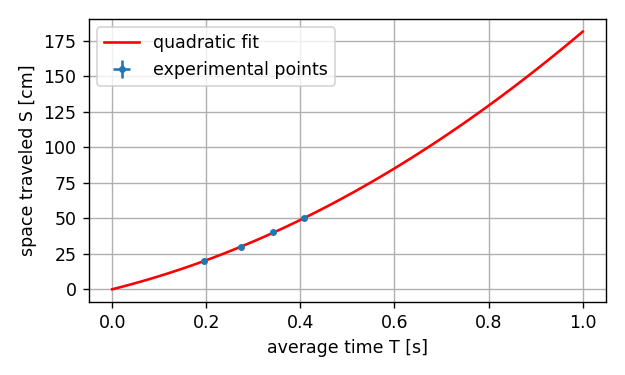

In [475]:
import math
import numpy as np
H     = (29.7 - 2.7) - (2.4-2.2)
dH    = 0.2 ### SUBSTITUTE HERE THE EXPRESSION OBTAINED BY THE FORMULA FOR UNCERTAINTY PROPAGATION ###
L = 121.7

sina  = H / L 
alpha = asin(sina)*180/pi                  # [degrees] inclination angle
dsina = sqrt( (dH/L)**2 + (H/L**2 * dL)**2)  # uncertainty is estimated using uncertainty propagation formula

n     = 5                           # number of measures of time for each value of S
aveT  = average(T,axis=1)                    # average time, for each value of S
stdT  = std(T,axis=1)                        # standard deviation
errT  = stdT / sqrt(n-1)                     # standard error of the mean

A, dA, B, dB = quadratic_fit(aveT,S)

v1   = B
dv1  = dB
a    = 2*A
da   = 2*dA

g    = a/sina
dg   = 1.0 ### SUBSTITUTE HERE THE EXPRESSION OBTAINED BY THE FORMULA FOR UNCERTAINTY PROPAGATION ###

acc[H]=a                    # obtained results are saved in the dictionaries for later use
dacc[H]=da
sinalpha[H]=sina
dsinalpha[H]=dsina

# NB: the symbol %.30f means that the number (here, sina)
# has to be printed with 30 digits after the decimal point
### CHECK THAT THE NUMBER OF PRINTED DIGITS (SIGNIFICANT DIGITS)
### IS COMPATIBLE WITH ESTIMATE OF THE UNCERTAINTY!
print("standard error of the mean: ", errT)
print('')
print('H    = %.10f +/- %.10f cm\t(elevatin of rail end A)'%(H,dH))           
print('sina = %.30f +/- %.30f\t(seno dell angolo di inclinazione)'%(sina,dsina))

# NB: the symbol \t is a tabulation character

print('')
print('series\t| space S [cm]\t| mean time T [s]')
print('--------+---------------+--------------------')

for k in range(T.shape[0]):
    print('%i\t| %.11f +/- %.11f \t| %.15f +/- %.15f'
          %(k+1,S[k],dS[k],aveT[k],errT[k]))
    
print('')

print('v1 =  %.2f +/- %.2f cm/s\t(velocity when passing through first photogate)'% (v1, dv1)) 
print('a  = %.2f +/- %.2f cm/s**2\t(cart acceleration)'%(a, da))  
print('g  =%.2f +/- %.2f cm/s**2\t(estimate for gravity acceleration)'%(g, dg))  

print('')

t=linspace(0,1)
def fit_fun(t): return A*t**2 + B*t 

fig=figure('parabola (%.2f degree inclination)'
           %alpha,figsize=(5,3))
errorbar(aveT,S,xerr=errT,yerr=dS,fmt='.',label='experimental points')
plot(t,fit_fun(t),'r',label='quadratic fit')
legend()
xlabel('average time T [s]')
ylabel('space traveled S [cm]')
grid()
fig.tight_layout()


#### third series (third inclination value)

In [476]:

import numpy as np
# measure the length of the rail, from end to end
# physical units are cm
# the uncertainty is 0,5 millimeters since the sensibility of the instrument used is 1 millimeter. ​

L   = 121.7  # [cm] length of the rail
dL  = 0.05  # [cm] uncertainty on the length of the rail

# set the rail in horizontal position using the bubble level
# measure the distance between the rail surface and the table
# at each end of the rail (the two ends are here denoted as A and B) 
# physical units are... (cm)

hA0 =  2.7  # [cm] distance between the rail surface and the table in A
hB0 =  3.7  # [cm] distance between the rail surface and the table in B

dh0  =  0.05  # [cm] uncertainty is 0,5 millimeters since the sensibility of the instrument used is 1 millimeter.

# now incline the rail and measure again the distance between
# the rail surface and the table in both A and B

hA  = 10.7  # [cm] distance between the rail surface and the table in A
hB  = 2.3  # [cm] distance between the rail surface and the table in B

dh  =  0.2   # [cm] uncertainty is 2 mm since we are summing the 4 height’s uncertainties

# write here the list of the distances S between the two photogates 20,
# that will be used for data collection
# pay attention: do not change the python syntax (parentheses, brackets, 
# commas, etc. - emptly spaces do not matter)
# physical units are...cm 
# the uncertainty is...0.5 mm

S = np.array([
        20.0, # [cm] distance S1
        30.0, # [cm] distance S2
        40.0, # [cm] distance S3
        50.0, # [cm] distance S4
    ])

# physical units are... (cm)
# the uncertainty is... 0,5 mm since the sensibility of the instrument is 1 mm. ​


dS = np.array([ 
        0.05,  # [cm] uncertainty on distance S1
        0.05,  # [cm] uncertainty on distance S2
        0.05,  # [cm] uncertainty on distance S3
        0.05,  # [cm] uncertainty on distance S4
    ])

# write here the times between the passage from the first photogate
# and the passage through the second photogate
# T is a matrix containing in each row the times relative to a given value of S
# different rows correspond to different values of S
# physical units are... (seconds)

# write here the times between the passage from the first photogate
# and the passage through the second photogate
# T is a matrix containing in each row the times relative to a given value of S
# different rows correspond to different values of S
# physical units are... (TO BE COMPLETED)


T = array([
    [
    0.3885,   # at least 5 times, measured with the distance S1
    0.3879,
    0.3881,
    0.3889,
    0.3875,
    ],
   
    [
    0.5479,   # at least 5 times, measured with the distance S2
    0.5470,
    0.5471,
    0.5464,
    0.5469,
    ],
    
    [
    0.6847,   # at least 5 times, measured with the distance S3
    0.6855,
    0.6845,
    0.6837,
    0.6868,
    ],
    
    [
    0.8126,   # at least 5 times, measured with the distance S4
    0.8135,
    0.8121,
    0.8121,
    0.8103,
    ]
])

# estimate the uncertainty on times using the standard error of the mean
#The standard error of the mean is found through this formula: 
errT  = stdT / sqrt(n-1)  



#### third series: data analysis

standard error of the mean:  [0.00024166 0.00024207 0.00052498 0.00052192]

H    = 7.9000000000 +/- 0.2000000000 cm	(elevatin of rail end A)
sina = 0.064913722267871815096995646854 +/- 0.001643601762219449192309328467	(seno dell angolo di inclinazione)

series	| space S [cm]	| mean time T [s]
--------+---------------+--------------------
1	| 20.00000000000 +/- 0.05000000000 	| 0.388180000000000 +/- 0.000241660919472
2	| 30.00000000000 +/- 0.05000000000 	| 0.547060000000000 +/- 0.000242074368738
3	| 40.00000000000 +/- 0.05000000000 	| 0.685040000000000 +/- 0.000524976189936
4	| 50.00000000000 +/- 0.05000000000 	| 0.812120000000000 +/- 0.000521919534028

v1 =  41.77 +/- 0.52 cm/s	(velocity when passing through first photogate)
a  = 48.62 +/- 1.50 cm/s**2	(cart acceleration)
g  =748.96 +/- 1.00 cm/s**2	(estimate for gravity acceleration)



<IPython.core.display.Javascript object>


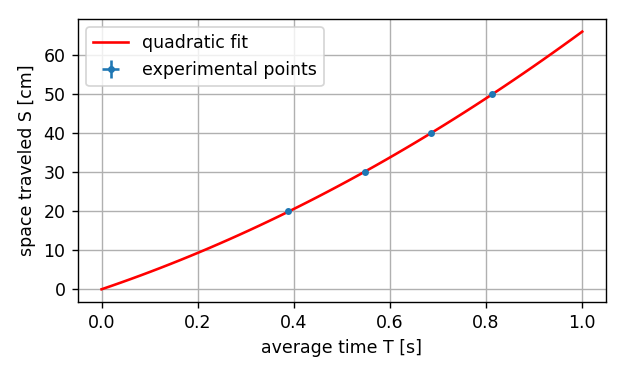

In [477]:
import math
import numpy as np
H     = (10.7 - 2.7) - (2.3-2.2)
dH    = 0.2 ### SUBSTITUTE HERE THE EXPRESSION OBTAINED BY THE FORMULA FOR UNCERTAINTY PROPAGATION ###
L = 121.7

sina  = H / L 
alpha = asin(sina)*180/pi                  # [degrees] inclination angle
dsina = sqrt( (dH/L)**2 + (H/L**2 * dL)**2)  # uncertainty is estimated using uncertainty propagation formula

n     = 5                           # number of measures of time for each value of S
aveT  = average(T,axis=1)                    # average time, for each value of S
stdT  = std(T,axis=1)                        # standard deviation
errT  = stdT / sqrt(n-1)                     # standard error of the mean

A, dA, B, dB = quadratic_fit(aveT,S)

v1   = B
dv1  = dB
a    = 2*A
da   = 2*dA

g    = a/sina
dg   = 1.0 ### SUBSTITUTE HERE THE EXPRESSION OBTAINED BY THE FORMULA FOR UNCERTAINTY PROPAGATION ###

acc[H]=a                    # obtained results are saved in the dictionaries for later use
dacc[H]=da
sinalpha[H]=sina
dsinalpha[H]=dsina

# NB: the symbol %.30f means that the number (here, sina)
# has to be printed with 30 digits after the decimal point
### CHECK THAT THE NUMBER OF PRINTED DIGITS (SIGNIFICANT DIGITS)
### IS COMPATIBLE WITH ESTIMATE OF THE UNCERTAINTY!
print("standard error of the mean: ", errT)
print('')
print('H    = %.10f +/- %.10f cm\t(elevatin of rail end A)'%(H,dH))           
print('sina = %.30f +/- %.30f\t(seno dell angolo di inclinazione)'%(sina,dsina))

# NB: the symbol \t is a tabulation character

print('')
print('series\t| space S [cm]\t| mean time T [s]')
print('--------+---------------+--------------------')

for k in range(T.shape[0]):
    print('%i\t| %.11f +/- %.11f \t| %.15f +/- %.15f'
          %(k+1,S[k],dS[k],aveT[k],errT[k]))
    
print('')

print('v1 =  %.2f +/- %.2f cm/s\t(velocity when passing through first photogate)'% (v1, dv1)) 
print('a  = %.2f +/- %.2f cm/s**2\t(cart acceleration)'%(a, da))  
print('g  =%.2f +/- %.2f cm/s**2\t(estimate for gravity acceleration)'%(g, dg))  

print('')

t=linspace(0,1)
def fit_fun(t): return A*t**2 + B*t 

fig=figure('parabola (%.2f degree inclination)'
           %alpha,figsize=(5,3))
errorbar(aveT,S,xerr=errT,yerr=dS,fmt='.',label='experimental points')
plot(t,fit_fun(t),'r',label='quadratic fit')
legend()
xlabel('average time T [s]')
ylabel('space traveled S [cm]')
grid()
fig.tight_layout()


#### fourth series (fourth inclination value)

In [478]:

import numpy as np
# measure the length of the rail, from end to end
# physical units are cm
# the uncertainty is 0,5 millimeters since the sensibility of the instrument used is 1 millimeter. ​

L   = 121.7  # [cm] length of the rail
dL  = 0.05  # [cm] uncertainty on the length of the rail

# set the rail in horizontal position using the bubble level
# measure the distance between the rail surface and the table
# at each end of the rail (the two ends are here denoted as A and B) 
# physical units are... (cm)

hA0 =  2.7  # [cm] distance between the rail surface and the table in A
hB0 =  3.7  # [cm] distance between the rail surface and the table in B

dh0  =  0.05  # [cm] uncertainty is 0,5 millimeters since the sensibility of the instrument used is 1 millimeter.

# now incline the rail and measure again the distance between
# the rail surface and the table in both A and B

hA  = 46.4  # [cm] distance between the rail surface and the table in A
hB  = 2.1   # [cm] distance between the rail surface and the table in B

dh  =  0.2   # [cm] uncertainty is 2 mm since we are summing the 4 height’s uncertainties

# write here the list of the distances S between the two photogates 20,
# that will be used for data collection
# pay attention: do not change the python syntax (parentheses, brackets, 
# commas, etc. - emptly spaces do not matter)
# physical units are...cm 
# the uncertainty is...0.5 mm

S = np.array([
        20.0, # [cm] distance S1
        30.0, # [cm] distance S2
        40.0, # [cm] distance S3
        50.0, # [cm] distance S4
    ])

# physical units are... (cm)
# the uncertainty is... 0,5 mm since the sensibility of the instrument is 1 mm. ​


dS = np.array([ 
        0.05,  # [cm] uncertainty on distance S1
        0.05,  # [cm] uncertainty on distance S2
        0.05,  # [cm] uncertainty on distance S3
        0.05,  # [cm] uncertainty on distance S4
    ])

# write here the times between the passage from the first photogate
# and the passage through the second photogate
# T is a matrix containing in each row the times relative to a given value of S
# different rows correspond to different values of S
# physical units are... (seconds)



T = array([
    [
    0.1518,   # at least 5 times, measured with the distance S1
    0.1513,
    0.1517,
    0.1516,
    0.1512,
    ],
   
    [
    0.2128,   # at least 5 times, measured with the distance S2
    0.2131,
    0.2141,
    0.2137,
    0.2148,
    ],
    
    [
    0.2677,   # at least 5 times, measured with the distance S3
    0.2673,
    0.2675,
    0.2674,
    0.2678,
    ],
    
    [
    0.3165,   # at least 5 times, measured with the distance S4
    0.3163,
    0.3169,
    0.3170,
    0.3168,
    ]
])

# estimate the uncertainty on times using the standard error of the mean
# #The standard error of the mean is found through this formula: 
errT  = stdT / sqrt(n-1)  



#### fourth series: data analysis

standard error of the mean:  [1.15758369e-04 3.56370594e-04 9.27361850e-05 1.30384048e-04]

H    = 43.8000000000 +/- 0.2000000000 cm	(elevatin of rail end A)
sina = 0.359901396877567780752116277654 +/- 0.001650024030334874521400156944	(seno dell angolo di inclinazione)

series	| space S [cm]	| mean time T [s]
--------+---------------+--------------------
1	| 20.00000000000 +/- 0.05000000000 	| 0.151520000000000 +/- 0.000115758369028
2	| 30.00000000000 +/- 0.05000000000 	| 0.213700000000000 +/- 0.000356370593624
3	| 40.00000000000 +/- 0.05000000000 	| 0.267540000000000 +/- 0.000092736184955
4	| 50.00000000000 +/- 0.05000000000 	| 0.316700000000000 +/- 0.000130384048104

v1 =  106.53 +/- 1.65 cm/s	(velocity when passing through first photogate)
a  = 322.88 +/- 12.13 cm/s**2	(cart acceleration)
g  =897.12 +/- 1.00 cm/s**2	(estimate for gravity acceleration)



<IPython.core.display.Javascript object>


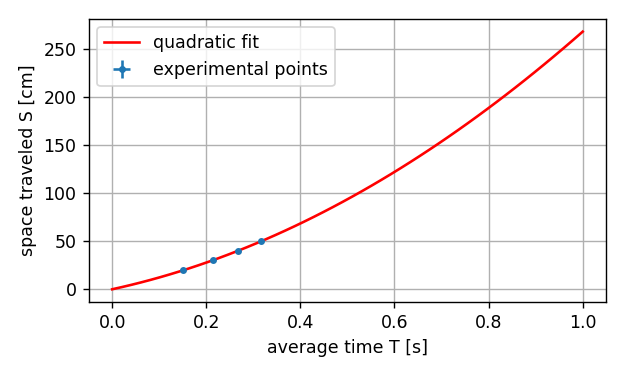

In [479]:
import math
import numpy as np
H     = (46.4 - 2.7) - (2.1-2.2)
dH    = 0.2 ### SUBSTITUTE HERE THE EXPRESSION OBTAINED BY THE FORMULA FOR UNCERTAINTY PROPAGATION ###
L = 121.7

sina  = H / L 
alpha = asin(sina)*180/pi                  # [degrees] inclination angle
dsina = sqrt( (dH/L)**2 + (H/L**2 * dL)**2)  # uncertainty is estimated using uncertainty propagation formula

n     = 5                           # number of measures of time for each value of S
aveT  = average(T,axis=1)                    # average time, for each value of S
stdT  = std(T,axis=1)                        # standard deviation
errT  = stdT / sqrt(n-1)                     # standard error of the mean

A, dA, B, dB = quadratic_fit(aveT,S)

v1   = B
dv1  = dB
a    = 2*A
da   = 2*dA

g    = a/sina
dg   = 1.0 ### SUBSTITUTE HERE THE EXPRESSION OBTAINED BY THE FORMULA FOR UNCERTAINTY PROPAGATION ###

acc[H]=a                    # obtained results are saved in the dictionaries for later use
dacc[H]=da
sinalpha[H]=sina
dsinalpha[H]=dsina

# NB: the symbol %.30f means that the number (here, sina)
# has to be printed with 30 digits after the decimal point
### CHECK THAT THE NUMBER OF PRINTED DIGITS (SIGNIFICANT DIGITS)
### IS COMPATIBLE WITH ESTIMATE OF THE UNCERTAINTY!
print("standard error of the mean: ", errT)
print('')
print('H    = %.10f +/- %.10f cm\t(elevatin of rail end A)'%(H,dH))           
print('sina = %.30f +/- %.30f\t(seno dell angolo di inclinazione)'%(sina,dsina))

# NB: the symbol \t is a tabulation character

print('')
print('series\t| space S [cm]\t| mean time T [s]')
print('--------+---------------+--------------------')

for k in range(T.shape[0]):
    print('%i\t| %.11f +/- %.11f \t| %.15f +/- %.15f'
          %(k+1,S[k],dS[k],aveT[k],errT[k]))
    
print('')

print('v1 =  %.2f +/- %.2f cm/s\t(velocity when passing through first photogate)'% (v1, dv1)) 
print('a  = %.2f +/- %.2f cm/s**2\t(cart acceleration)'%(a, da))  
print('g  =%.2f +/- %.2f cm/s**2\t(estimate for gravity acceleration)'%(g, dg))  

print('')

t=linspace(0,1)
def fit_fun(t): return A*t**2 + B*t 

fig=figure('parabola (%.2f degree inclination)'
           %alpha,figsize=(5,3))
errorbar(aveT,S,xerr=errT,yerr=dS,fmt='.',label='experimental points')
plot(t,fit_fun(t),'r',label='quadratic fit')
legend()
xlabel('average time T [s]')
ylabel('space traveled S [cm]')
grid()
fig.tight_layout()

#### fifth series (fifth inclination value)

In [480]:

import numpy as np
# measure the length of the rail, from end to end
# physical units are cm
# the uncertainty is 0,5 millimeters since the sensibility of the instrument used is 1 millimeter. ​

L   = 121.7  # [cm] length of the rail
dL  = 0.05  # [cm] uncertainty on the length of the rail

# set the rail in horizontal position using the bubble level
# measure the distance between the rail surface and the table
# at each end of the rail (the two ends are here denoted as A and B) 
# physical units are... (cm)

hA0 =  2.7  # [cm] distance between the rail surface and the table in A
hB0 =  3.7  # [cm] distance between the rail surface and the table in B

dh0  =  0.05  # [cm] uncertainty is 0,5 millimeters since the sensibility of the instrument used is 1 millimeter.

# now incline the rail and measure again the distance between
# the rail surface and the table in both A and B

hA  = 27.5  # [cm] distance between the rail surface and the table in A
hB  = 2.2   # [cm] distance between the rail surface and the table in B

dh  =  0.2   # [cm] uncertainty is 2 mm since we are summing the 4 height’s uncertainties

# write here the list of the distances S between the two photogates 20,
# that will be used for data collection
# pay attention: do not change the python syntax (parentheses, brackets, 
# commas, etc. - emptly spaces do not matter)
# physical units are...cm 
# the uncertainty is...0.5 mm

S = np.array([
        20.0, # [cm] distance S1
        30.0, # [cm] distance S2
        40.0, # [cm] distance S3
        50.0, # [cm] distance S4
    ])

# physical units are... (cm)
# the uncertainty is... 0,5 mm since the sensibility of the instrument is 1 mm. ​


dS = np.array([ 
        0.05,  # [cm] uncertainty on distance S1
        0.05,  # [cm] uncertainty on distance S2
        0.05,  # [cm] uncertainty on distance S3
        0.05,  # [cm] uncertainty on distance S4
    ])

# write here the times between the passage from the first photogate
# and the passage through the second photogate
# T is a matrix containing in each row the times relative to a given value of S
# different rows correspond to different values of S
# physical units are... (seconds)


T = array([
    [
    0.2012,   # at least 5 times, measured with the distance S1
    0.2011,
    0.2013,
    0.2012,
    0.2014,
    ],
   
    [
    0.2881,   # at least 5 times, measured with the distance S2
    0.2881,
    0.2882,
    0.2884,
    0.2883,
    ],
    
    [
    0.3624,   # at least 5 times, measured with the distance S3
    0.3624,
    0.3620,
    0.3623,
    0.3621,
    ],
    
    [
    0.4223,   # at least 5 times, measured with the distance S4
    0.4233,
    0.4234,
    0.4231,
    0.4228,
    ]
])

# estimate the uncertainty on times using the standard error of the mean
# #The standard error of the mean is found through this formula: 
errT  = stdT / sqrt(n-1)  



#### fifth series: data analysis

standard error of the mean:  [5.09901951e-05 5.83095189e-05 8.12403840e-05 1.98494332e-04]

H    = 24.8000000000 +/- 0.2000000000 cm	(elevatin of rail end A)
sina = 0.203779786359901404768635302389 +/- 0.001645516602921667098646807403	(seno dell angolo di inclinazione)
standard error of the mean:  [5.09901951e-05 5.83095189e-05 8.12403840e-05 1.98494332e-04]

series	| space S [cm]	| mean time T [s]
--------+---------------+--------------------
1	| 20.00000000000 +/- 0.05000000000 	| 0.201240000000000 +/- 0.000050990195136
2	| 30.00000000000 +/- 0.05000000000 	| 0.288220000000000 +/- 0.000058309518948
3	| 40.00000000000 +/- 0.05000000000 	| 0.362240000000000 +/- 0.000081240384046
4	| 50.00000000000 +/- 0.05000000000 	| 0.422980000000000 +/- 0.000198494332413

v1 =  78.65 +/- 4.54 cm/s	(velocity when passing through first photogate)
a  = 182.89 +/- 24.89 cm/s**2	(cart acceleration)
g  =897.49 +/- 1.00 cm/s**2	(estimate for gravity acceleration)



<IPython.core.display.Javascript object>


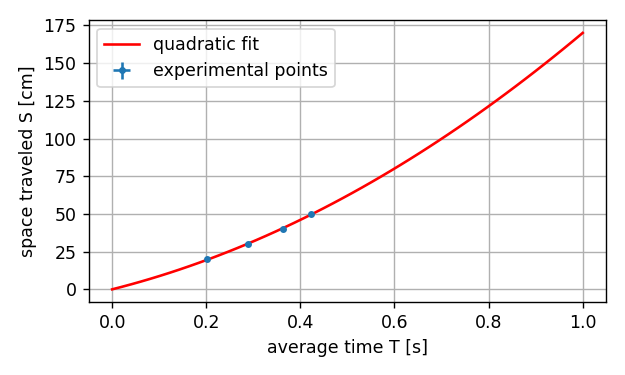

In [481]:
import math
import numpy as np
H     = (27.5 - 2.7) - (2.2-2.2)
dH    = 0.2 ### SUBSTITUTE HERE THE EXPRESSION OBTAINED BY THE FORMULA FOR UNCERTAINTY PROPAGATION ###
L = 121.7

sina  = H / L 
alpha = asin(sina)*180/pi                  # [degrees] inclination angle
dsina = sqrt( (dH/L)**2 + (H/L**2 * dL)**2)  # uncertainty is estimated using uncertainty propagation formula

n     = 5                           # number of measures of time for each value of S
aveT  = average(T,axis=1)                    # average time, for each value of S
stdT  = std(T,axis=1)                        # standard deviation
errT  = stdT / sqrt(n-1)                     # standard error of the mean

A, dA, B, dB = quadratic_fit(aveT,S)

v1   = B
dv1  = dB
a    = 2*A
da   = 2*dA

g    = a/sina
dg   = 1.0 ### SUBSTITUTE HERE THE EXPRESSION OBTAINED BY THE FORMULA FOR UNCERTAINTY PROPAGATION ###

acc[H]=a                    # obtained results are saved in the dictionaries for later use
dacc[H]=da
sinalpha[H]=sina
dsinalpha[H]=dsina

# NB: the symbol %.30f means that the number (here, sina)
# has to be printed with 30 digits after the decimal point
### CHECK THAT THE NUMBER OF PRINTED DIGITS (SIGNIFICANT DIGITS)
### IS COMPATIBLE WITH ESTIMATE OF THE UNCERTAINTY!
print("standard error of the mean: ", errT)
print('')
print('H    = %.10f +/- %.10f cm\t(elevatin of rail end A)'%(H,dH))           
print('sina = %.30f +/- %.30f\t(seno dell angolo di inclinazione)'%(sina,dsina))

# NB: the symbol \t is a tabulation character
print("standard error of the mean: ", errT)
print('')
print('series\t| space S [cm]\t| mean time T [s]')
print('--------+---------------+--------------------')

for k in range(T.shape[0]):
    print('%i\t| %.11f +/- %.11f \t| %.15f +/- %.15f'
          %(k+1,S[k],dS[k],aveT[k],errT[k]))
    
print('')

print('v1 =  %.2f +/- %.2f cm/s\t(velocity when passing through first photogate)'% (v1, dv1)) 
print('a  = %.2f +/- %.2f cm/s**2\t(cart acceleration)'%(a, da))  
print('g  =%.2f +/- %.2f cm/s**2\t(estimate for gravity acceleration)'%(g, dg))  

print('')

t=linspace(0,1)
def fit_fun(t): return A*t**2 + B*t 

fig=figure('parabola (%.2f degree inclination)'
           %alpha,figsize=(5,3))
errorbar(aveT,S,xerr=errT,yerr=dS,fmt='.',label='experimental points')
plot(t,fit_fun(t),'r',label='quadratic fit')
legend()
xlabel('average time T [s]')
ylabel('space traveled S [cm]')
grid()
fig.tight_layout()


### Estimate for $g$ (friction is neglected)


g = 917.38 +/- 46.45	 cm/s**2 (estimate for gravity acceleration)



<IPython.core.display.Javascript object>


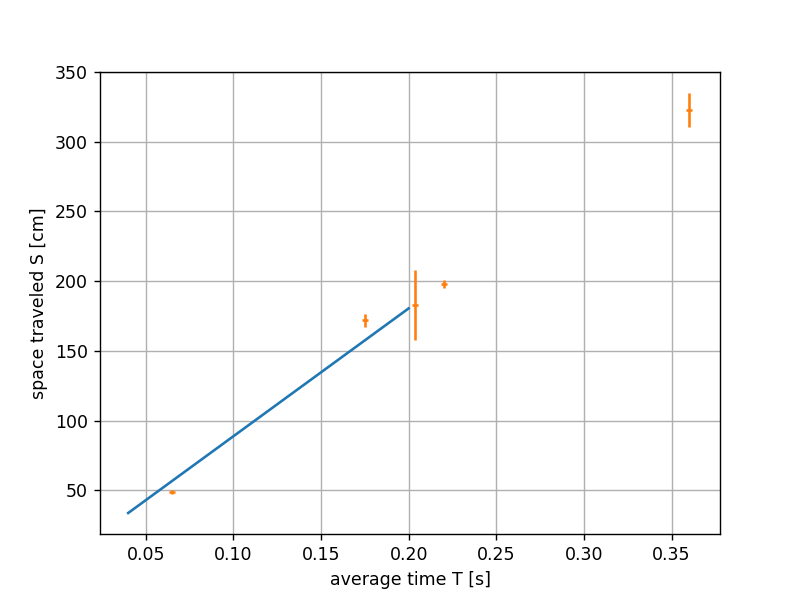

In [482]:
### Check the linear relation between sinα and the acceleration a
###
### (the interpolating line is between the error bars?)
###

# these values have been collected during the previous measures 
# and where stored in the dictionaries to be now used:

a=array([acc[k] for k in sorted(acc)])
da=array([dacc[k] for k in sorted(acc)])
sina=array([sinalpha[k] for k in sorted(acc)])
dsina=array([dsinalpha[k] for k in sorted(acc)])

# Check the linear relation
# Complete the definition of the function linear_fit in one of the above cells

A, dA, B, dB = linear_fit(sina, a)

def fit_fun(x): return A + B*x 

g=B
dg=dB ### ADD HERE THE CORRECT EXPRESSION ###

print('')
print('g = %.2f +/- %.2f\t cm/s**2 (estimate for gravity acceleration)' % (g, dg))  
print('')

# add physical units to the printed value

# print only the correct number of significant digits

# add axis labels and phyisical units to the graph

dt=linspace(0.04,0.2)  
fig=figure('fit lineare')
plot(dt,fit_fun(dt))  
errorbar(sina, a, xerr=dsina, yerr=da, ls='none')
xlabel('average time T [s]')
ylabel('space traveled S [cm]')
grid()

### Estimate $g$ if $\mu_\mathrm{d}>0$
Using the equations for $\alpha$ and $a$ for two different inclination values, solve for $g$ e $\mu_k$
Can you give an estimate for the uncertainty?
Can friction be neglected?

In [483]:

# We use the third and fourth series' data because these two have the bigger difference in their inclination, thus the
# difference between the normal forces is bigger and friction plays a more important role in the difference of the two
#accellerations a1 and a2
H1 	= (10.7 - 2.7) - (2.3-2.2)
H2 = (46.4 - 2.7) - (2.1-2.2)
L = 121.7
K1 = sqrt(L**2 - H1**2)
K2 = sqrt(L**2 - H2**2)

sina1 = H1 / L
sina2 = H2 / L
cosa1 = K1 / L
cosa2 = K2 / L

a1 = 48.6176183685
a2 = 322.8758275016

mud = (a1*sina2 - a2*sina1)/(a1*cosa2 - a2*cosa1)
g = a1/(sina1 - mud*cosa1)

print("g: ","%.2f" % g, "cm/s**2 //Dynamic friction percentage", round(mud*100,2), "%")
# In our case dynamic friction corresponds to a 1.25 % of the normal force, which is a small enough value to be neglected


g:  927.18 cm/s**2 //Dynamic friction percentage 1.25 %


Can you estimate $g$ and $\mu_\mathrm{d}$ with a linear fit, using all the available measures?

[hint: use the linear relation $y = Bx + A$ where $y=\frac{a}{\cos\alpha}$, $x=\tan\alpha$]

In [484]:
a1 = 171.9059877554
sina1 = 0.175020542317173372071081871582
tana1 = tan(asin(sina1))
cosa1 = cos(asin(sina1))

a2 = 197.8514228113
sina2 = 0.220213640098603113948172449454
tana2 = tan(asin(sina2))
cosa2 = cos(asin(sina2))

a3 = 48.6176183685
sina3 = 0.064913722267871815096995646854
tana3 = tan(asin(sina3))
cosa3 = cos(asin(sina3))

a4 = 322.8758275016
sina4 = 0.359901396877567780752116277654
tana4 = tan(asin(sina4))
cosa4 = cos(asin(sina4))

a5 = 182.8902409789
sina5 = 0.203779786359901404768635302389
tana5 = tan(asin(sina5))
cosa5 = cos(asin(sina5))

x = array([
	tana1,
	tana2,
	tana3,
	tana4,
	tana5
])

y = array([
	a1/cosa1,
	a2/cosa2,
	a3/cosa3,
	a4/cosa4,
	a5/cosa5
])

A, dA, B, dB = linear_fit(x, y)

g = B
mud = -A/g

print("g: ", "%.2f" % g, "cm/s**2 //Dynamic friction percentage",round(mud*100, 2), "%")

# with this approach dynamic friction results even more negligible, it corresponds to a 0.2 % of the normal force


g:  914.04 cm/s**2 //Dynamic friction percentage 0.27 %
